In [1]:
%run 'pymol_and_pdb_functions.py'
start_pymol()

/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


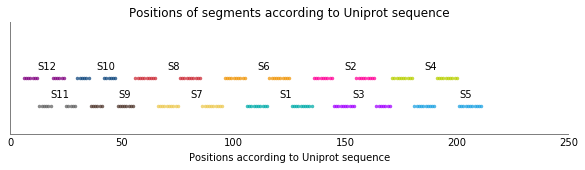

1886 unique mutations across all segments
238 natural unique mutations across all segments
There are 231 single mutations with known effects. They are found in 120 positions


In [2]:
import itertools

%run 'ks01_Data_import.ipynb'
notebook_prefix = 'ks17'
image_counter = Counter()

In [4]:
his3_24mer_file = os.path.join(structure_predictions_folder, 'his3_24mer_assembly', 
                                                  'his3_swiss_aligned_to_4lom_assembly.pdb')

structural_data = pd.read_hdf(files_dump_folder + 'structural_data_for_predicted_24mer.hdf', 'data')

In [28]:
columns_to_exclude = ['Scer_aa', 'aa1', 'aa3', 'secondary_structure','amino_acid', 'pKa of ionizing side chaina']
quantitative_columns = [c for c in structural_data.columns if 'res_' not in c and c not in columns_to_exclude]
printlist(quantitative_columns)

Mn_302
Mn_303
Mn_304
Mn_substrate_bound
substrate
position
interface
lucas_sign_epistasis
lucas_reciprocal_sign_epistasis
segment
alignment_entropy
alignment_gap_fraction
conservation_score
Average residue mass (daltons)
Monoisotopic mass (daltons)
Occurrence in proteins, %
Average volume of buried residues, A3
Van der Waals volume, A3
Accessible surface area, A2
Fraction of buried among this aa
Fraction of buried among all buried
Polarity average ranking
Polarity ranking (Radzicka and Wolfenden 1988)
impact_mean
impact_median
impact_std
impact_mean_impact
impact_median_impact
impact_std_impact



### Graphs

In [ ]:
%run 'ks08_Epistasis_in_all_backgrounds.ipynb'

In [48]:
quantitative_columns_dict = {
    'Mn_302': 'Distance to the Mn atom coordinating substrate (#302)',
    'Mn_303' : 'Distance to the Mn atom coordinating (#303)',
    'Mn_304' : 'Distance to the Mn atom between monomers (#304)',
    'Mn_substrate_bound' : 'Minimal distance to a Mn atom coordinating substrate',
    'substrate' : 'distance to the substrate',
    'position' : 'sequence position',
    'alignment_entropy' : 'Entropy of a position in alignment',
    'alignment_gap_fraction' : 'Fraction of gaps in alignment',
    'conservation_score' : 'Conservation score of the position in alignment',
    'Average residue mass (daltons)' : 'Average residue mass (daltons)',
    'Occurrence in proteins, %' : 'Occurrence in proteins, %' ,
    'Average volume of buried residues, A3' : 'Average volume of buried residues, A3',
    'Van der Waals volume, A3' : 'Van der Waals volume, A3',
    'Accessible surface area, A2' : 'Accessible surface area, A2',
    'Fraction of buried among this aa' : 'Fraction of buried among this aa',
    'Fraction of buried among all buried' : 'Fraction of buried among all buried',
    'Polarity average ranking' : 'Average polarity ranking',
    'Polarity ranking (Radzicka and Wolfenden 1988)' : 'Polarity ranking (Radzicka and Wolfenden 1988)',
    'impact_mean' : 'Mean impact of mutations in all backgrounds',
    'impact_median' : 'Mean impact of mutations in all backgrounds',
    'impact_std' : 'Standard deviation impact of mutations in all backgrounds'}

In [49]:
from scipy import stats

### Parameters relevant for a single position

impact_mean
substrate
alignment_gap_fraction
Van der Waals volume, A3
Accessible surface area, A2
impact_median
Fraction of buried among all buried
Fraction of buried among this aa
Average volume of buried residues, A3
Average residue mass (daltons)
impact_std
Occurrence in proteins, %
Mn_303
Mn_302
Mn_304
Mn_substrate_bound
position
Polarity average ranking
alignment_entropy
conservation_score
Polarity ranking (Radzicka and Wolfenden 1988)


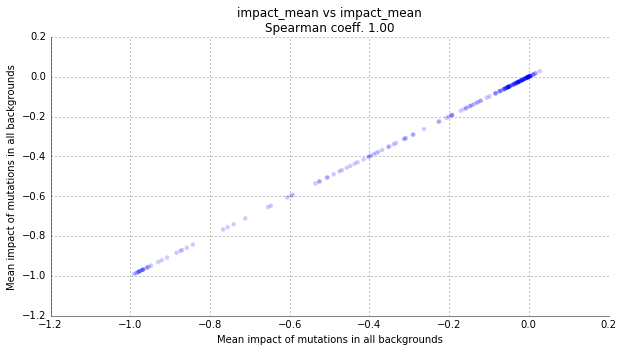

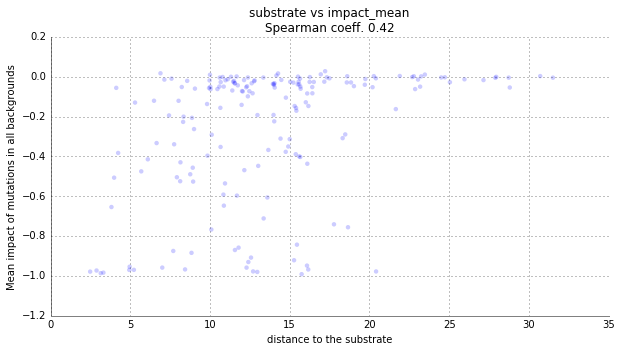

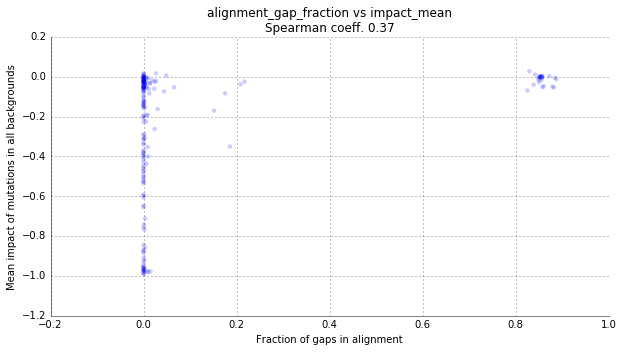

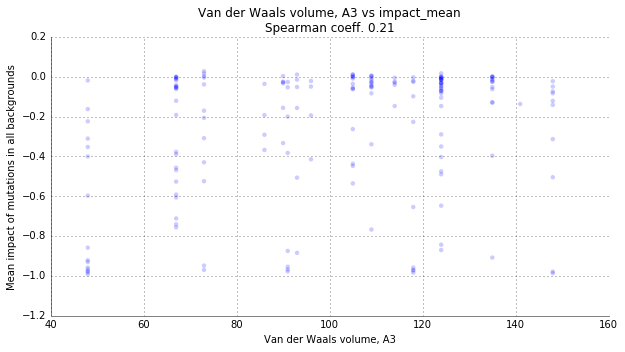

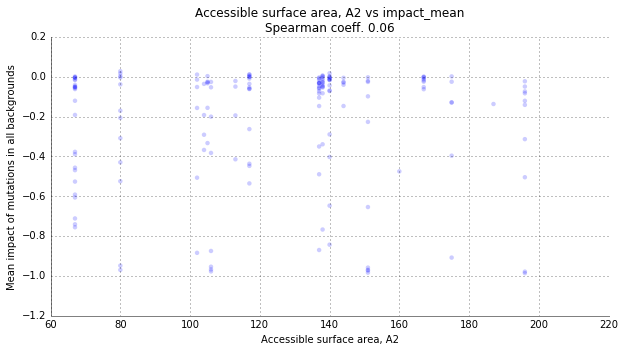

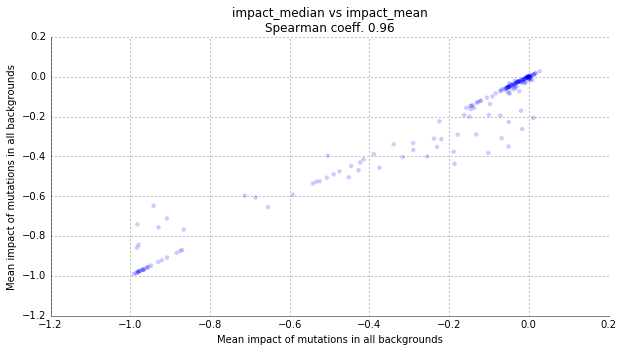

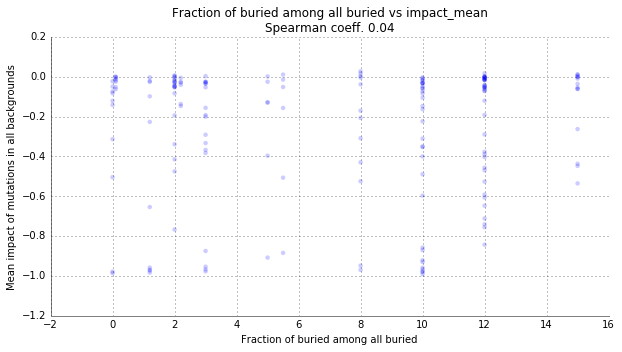

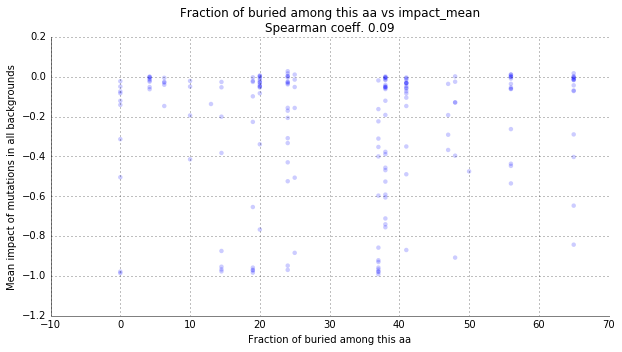

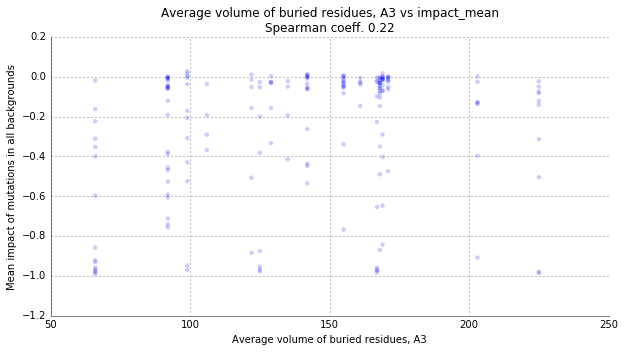

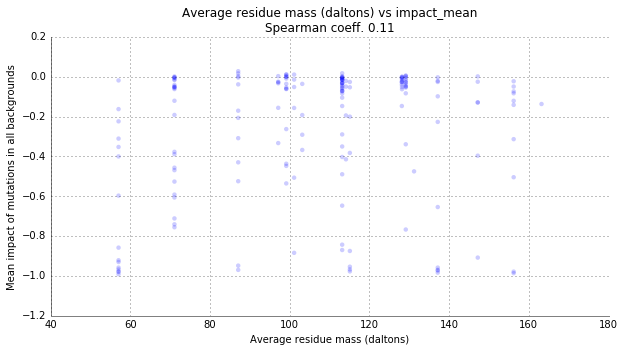

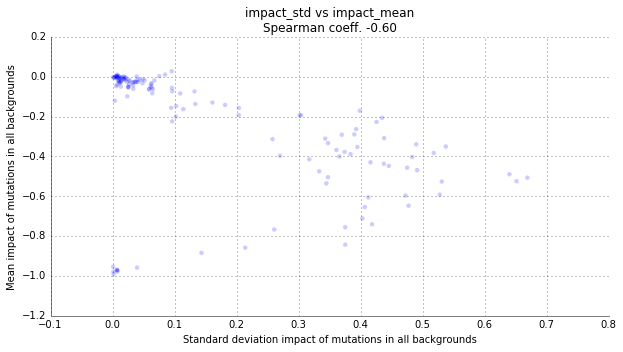

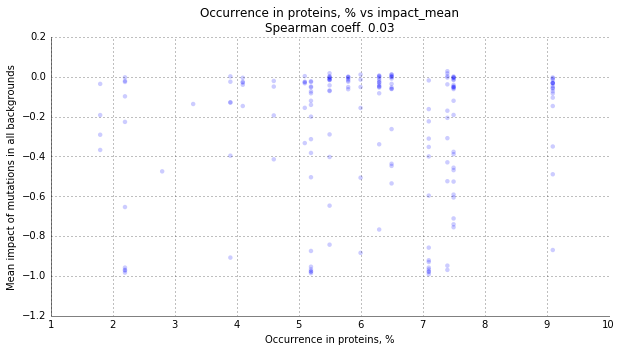

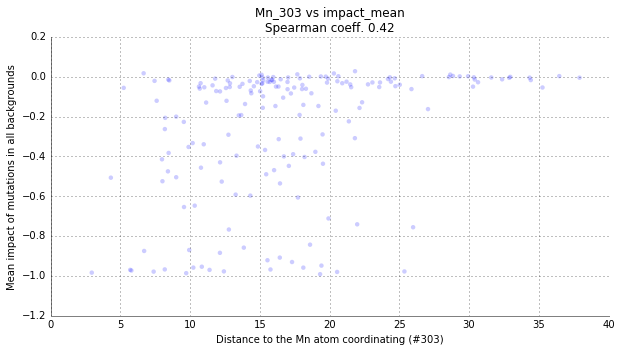

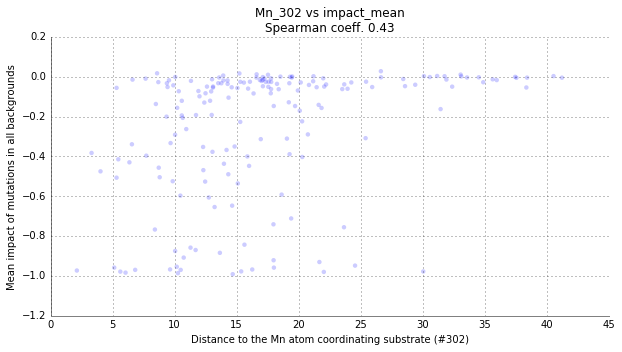

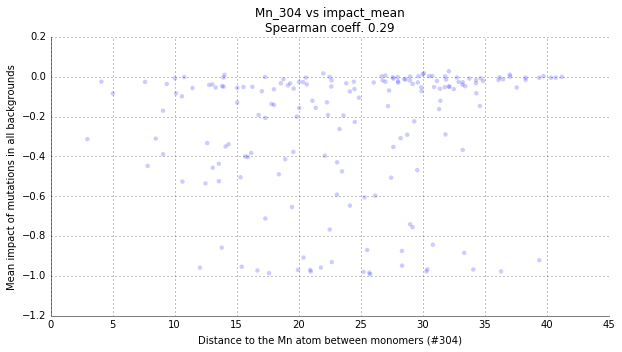

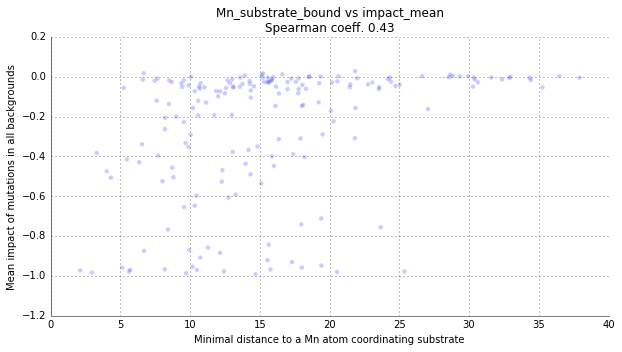

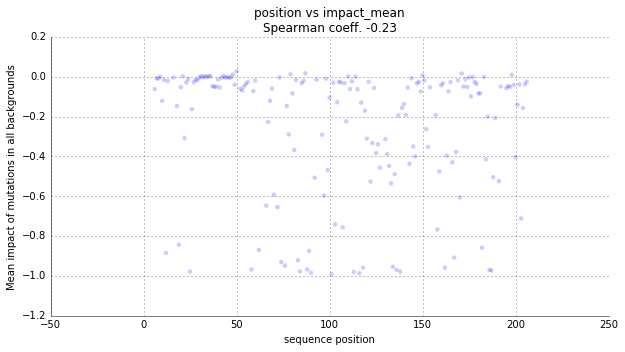

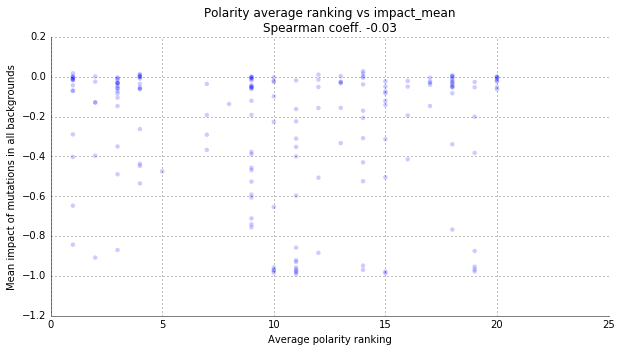

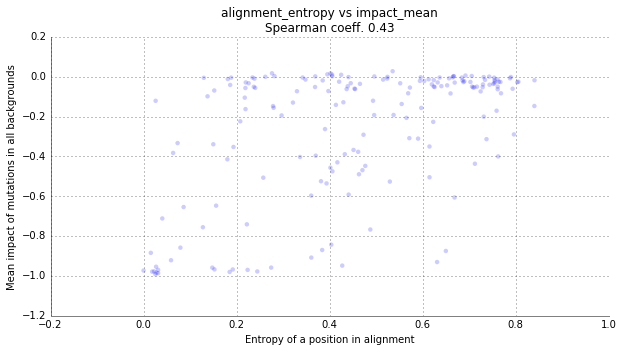

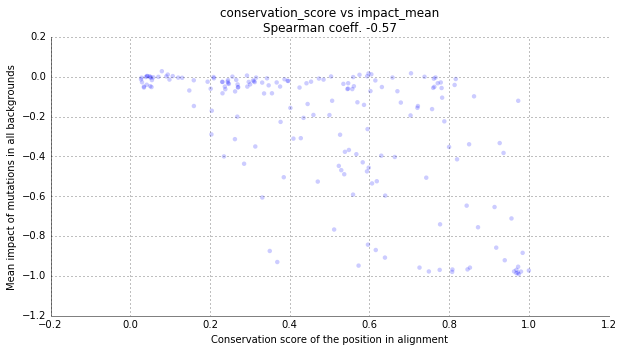

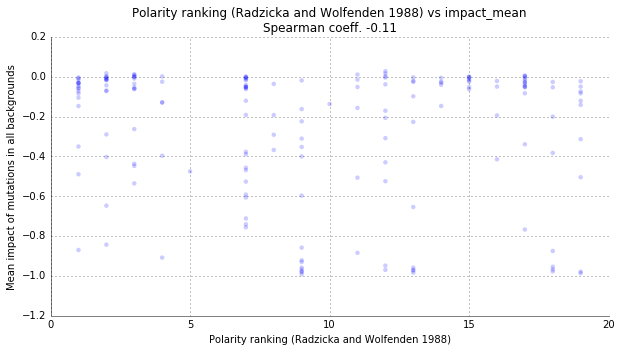

In [51]:
title = ''

x = 'Van der Waals volume, A3'
y = 'impact_mean'
for c in quantitative_columns_dict.keys():
    print c
    title = c + ' vs ' + y

    data_subset = structural_data[~np.isnan(structural_data[c]) & (~np.isnan(structural_data[y]))]
    plot_better()
    plt.scatter(data_subset[c], data_subset[y], edgecolor='none', alpha=0.2)
    plt.xlabel(quantitative_columns_dict[c])
    plt.ylabel(quantitative_columns_dict[y])
    correlation = stats.spearmanr(data_subset[c].values, data_subset[y].values)
    plt.title(title + '\nSpearman coeff. %.2f' %correlation[0])